In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import data_describe as mw

/Users/rishisheth/opt/anaconda3/envs/data_describe/lib/python3.7/site-packages/botocore/vendored/requests/packages/urllib3/_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping
/Users/rishisheth/opt/anaconda3/envs/data_describe/lib/python3.7/site-packages/botocore/vendored/requests/packages/urllib3/_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping
/Users/rishisheth/opt/anaconda3/envs/data_describe/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
# import mwdata as mw # Alpha release
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 50

In [ ]:
!gsutil cp gs://amazing-public-data/lending_club/lending_club_data.tsv .

In [14]:
df = pd.read_csv("./lending_club_data.tsv",sep='\t')

In [15]:
df.shape

(10000, 28)

In [16]:
df.head()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,zip_code,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,Medical,766xx,TX,10.87,0.0,12/1/92,0.0,NaN,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using this loan to pay off expenses accrued in the last...,debt consolidation,My Debt Consolidation Loan,660xx,KS,9.15,0.0,11/1/05,2.0,NaN,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,AP Personal Loan,916xx,CA,11.24,0.0,6/1/70,0.0,NaN,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,Debt Consolidation Loan,124xx,NY,6.18,1.0,9/1/82,0.0,16.0,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacation and buy a ring.",debt consolidation,consolidate,439xx,OH,19.03,0.0,10/1/99,4.0,NaN,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3


In [17]:
df.drop(['Id'], axis=1, inplace=True)

In [18]:
mw.data_summary(df)

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,zip_code,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
Data Type,int64,object,object,object,float64,object,object,object,object,object,object,object,float64,float64,object,float64,float64,float64,float64,float64,int64,float64,float64,object,float64,int64,object
Mean,0.1295,,,,68203,,,,,,,,13.3387,0.148174,,1.06693,35.8903,61.6524,9.33457,0.0601301,14271,48.4508,22.0113,,0,2.0022,
Standard Deviation,0.335769,,,,48590.3,,,,,,,,6.75421,0.50627,,1.47605,22.3614,46.1896,4.52659,0.251245,25437.9,28.2206,11.7094,,0,0.810963,
Median,0,,,,58000,,,,,,,,13.41,0,,1,34,86,9,0,8645.5,48.7,20,,0,2,
Min,0,,,,2000,,,,,,,,0,0,,0,0,0,1,0,0,0,1,,0,1,
Max,1,,,,900000,,,,,,,,29.99,11,,25,120,119,39,3,1207359,100.6,90,,0,3,
# Zeros,8705,,,,0,,,,,,,,58,8910,,4602,163,267,0,9422,278,254,0,,9968,0,
# Nulls,0,592,0,0,1,0,0,3230,0,4,0,0,0,5,5,5,6316,9160,5,5,0,26,5,0,32,0,0
% Most Frequent Value,87.05,0.37,21.6,47.45,3.81,43.67,99.98,0.03,44.54,5.48,1.58,17.48,0.58,89.1,0.95,46.02,1.63,2.67,10.35,94.22,2.78,2.54,3.69,99.83,99.68,34.24,20.98


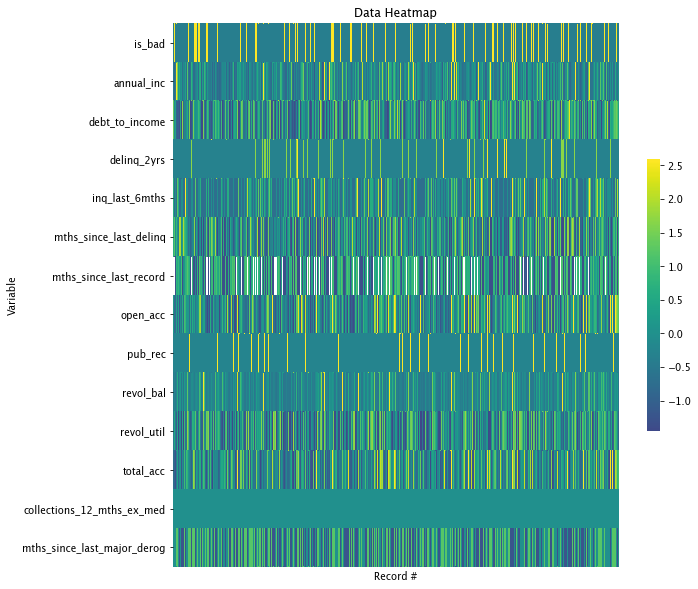

In [19]:
mw.data_heatmap(df)

In [20]:
bad_map = pd.DataFrame({'is_bad':[0,1], 'Bad Loan':['No', 'Yes']})

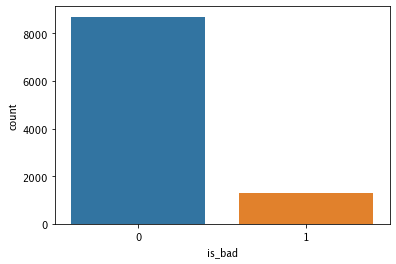

In [21]:
sns.countplot(x='is_bad', data=df.merge(bad_map))

In [22]:
mw.data_summary(df[['open_acc', 'annual_inc']])

,open_acc,annual_inc
Data Type,float64,float64
Mean,9.33457,68203
Standard Deviation,4.52659,48590.3
Median,9,58000
Min,1,2000
Max,39,900000
# Zeros,0,0
# Nulls,5,1
% Most Frequent Value,10.35,3.81


# Inspection of high income applicants

In [23]:
df_high_income = df.loc[df.annual_inc > 600000]
df_high_income.head()

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,zip_code,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
240,0,J.P. Morgan Chase,10,RENT,900000.0,VERIFIED - income source,n,"Borrower added on 09/10/10 > This loan will be repaid by February 1, 2011.<br/>",wedding,Wedding loan,100xx,NY,1.04,3.0,11/1/99,0.0,5.0,NaN,6.0,0.0,301,13.1,22.0,f,0.0,3,PC3
1296,0,IBM,10,MORTGAGE,744000.0,VERIFIED - income source,n,Borrower added on 10/18/10 > Debt Consolidation<br/>,debt consolidation,Jon's Loan,495xx,MI,1.44,0.0,1/1/95,5.0,NaN,NaN,14.0,0.0,17166,63.6,52.0,f,0.0,2,PC4
4577,1,vmware,4,MORTGAGE,700000.0,not verified,n,Looking for loan to complete remodel,home improvement,1717,333xx,FL,3.09,0.0,2/1/99,0.0,33.0,NaN,8.0,0.0,6960,44.6,14.0,f,0.0,2,PC4
6816,0,The Ayco Company,10,MORTGAGE,725000.0,VERIFIED - income,n,Borrower added on 09/05/11 > I plan to use the loan to consolidate a few debts purchase a few ...,debt consolidation,Personal Loan,750xx,TX,5.40,0.0,2/1/94,2.0,55.0,NaN,18.0,0.0,62892,70.3,53.0,f,0.0,3,PC2
7425,0,d&d sexton inc,10,RENT,780000.0,not verified,n,Borrower added on 08/22/10 > down payment and moving cost<br/>,house,House Loan,648xx,MO,0.52,0.0,2/1/87,3.0,NaN,113.0,8.0,1.0,1608,11.1,11.0,f,0.0,2,PC2


# Histograms

Text(0.5, 1.0, 'Histogram of open_acc')

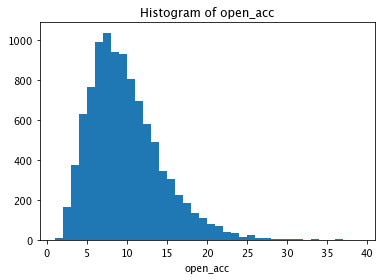

In [24]:
ax = df['open_acc'].hist(bins=38, grid=False) 
ax.set_xlabel('open_acc')
ax.set_title("Histogram of open_acc")

Text(0.5, 1.0, 'Histogram of revol_bal')

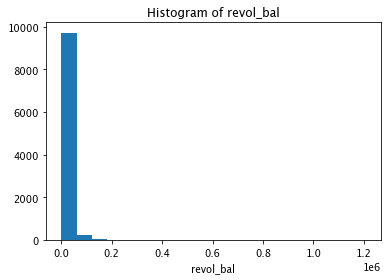

In [25]:
ax = df['revol_bal'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_bal')
ax.set_title("Histogram of revol_bal")

In [26]:
mw.data_summary(df[['revol_bal', 'annual_inc']])

,revol_bal,annual_inc
Data Type,int64,float64
Mean,14271,68203
Standard Deviation,25437.9,48590.3
Median,8645.5,58000
Min,0,2000
Max,1207359,900000
# Zeros,278,0
# Nulls,0,1
% Most Frequent Value,2.78,3.81


Text(0.5, 1.0, 'Histogram of revol_util')

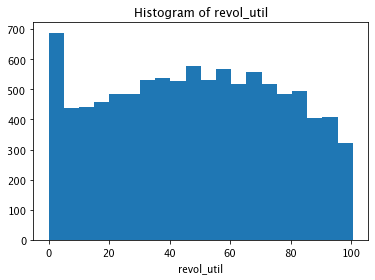

In [27]:
ax = df['revol_util'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_util')
ax.set_title("Histogram of revol_util")

In [28]:
mw.data_summary(df[['revol_util', 'annual_inc']])

,revol_util,annual_inc
Data Type,float64,float64
Mean,48.4508,68203
Standard Deviation,28.2206,48590.3
Median,48.7,58000
Min,0,2000
Max,100.6,900000
# Zeros,254,0
# Nulls,26,1
% Most Frequent Value,2.54,3.81


Text(0.5, 1.0, 'Histogram of delinq_2yrs')

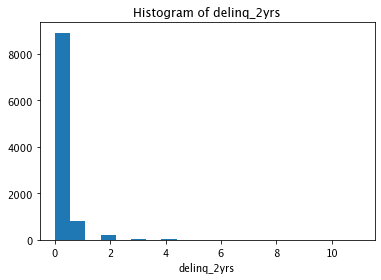

In [29]:
ax = df['delinq_2yrs'].hist(bins=20, grid=False) 
ax.set_xlabel('delinq_2yrs')
ax.set_title("Histogram of delinq_2yrs")

In [30]:
mw.data_summary(df[['delinq_2yrs', 'annual_inc']])

,delinq_2yrs,annual_inc
Data Type,float64,float64
Mean,0.148174,68203
Standard Deviation,0.50627,48590.3
Median,0,58000
Min,0,2000
Max,11,900000
# Zeros,8910,0
# Nulls,5,1
% Most Frequent Value,89.1,3.81


Text(0.5, 1.0, 'Histogram of inq_last_6mths')

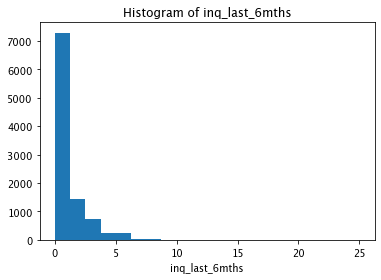

In [31]:
ax = df['inq_last_6mths'].hist(bins=20, grid=False) 
ax.set_xlabel('inq_last_6mths')
ax.set_title("Histogram of inq_last_6mths")

In [32]:
mw.data_summary(df[['inq_last_6mths', 'annual_inc']])

,inq_last_6mths,annual_inc
Data Type,float64,float64
Mean,1.06693,68203
Standard Deviation,1.47605,48590.3
Median,1,58000
Min,0,2000
Max,25,900000
# Zeros,4602,0
# Nulls,5,1
% Most Frequent Value,46.02,3.81


Text(0.5, 1.0, 'Histogram of mths_since_last_delinq')

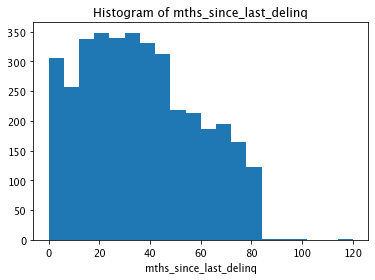

In [33]:
ax = df['mths_since_last_delinq'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_delinq')
ax.set_title("Histogram of mths_since_last_delinq")

In [34]:
mw.data_summary(df[['mths_since_last_delinq', 'annual_inc']])

,mths_since_last_delinq,annual_inc
Data Type,float64,float64
Mean,35.8903,68203
Standard Deviation,22.3614,48590.3
Median,34,58000
Min,0,2000
Max,120,900000
# Zeros,163,0
# Nulls,6316,1
% Most Frequent Value,1.63,3.81


Text(0.5, 1.0, 'Histogram of mths_since_last_record')

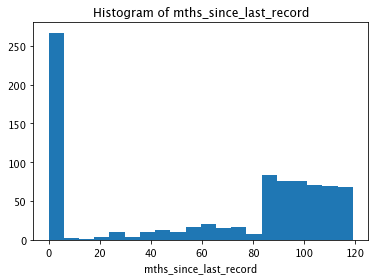

In [35]:
ax = df['mths_since_last_record'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_record')
ax.set_title("Histogram of mths_since_last_record")

In [36]:
mw.data_summary(df[['mths_since_last_record', 'annual_inc']])

,mths_since_last_record,annual_inc
Data Type,float64,float64
Mean,61.6524,68203
Standard Deviation,46.1896,48590.3
Median,86,58000
Min,0,2000
Max,119,900000
# Zeros,267,0
# Nulls,9160,1
% Most Frequent Value,2.67,3.81


Text(0.5, 1.0, 'Histogram of pub_rec')

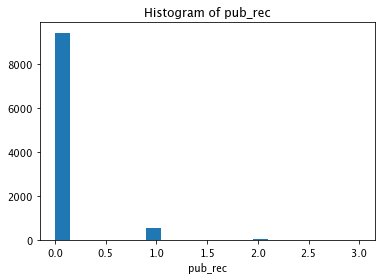

In [37]:
ax = df['pub_rec'].hist(bins=20, grid=False) 
ax.set_xlabel('pub_rec')
ax.set_title("Histogram of pub_rec")

In [38]:
mw.data_summary(df[['pub_rec', 'annual_inc']])

,pub_rec,annual_inc
Data Type,float64,float64
Mean,0.0601301,68203
Standard Deviation,0.251245,48590.3
Median,0,58000
Min,0,2000
Max,3,900000
# Zeros,9422,0
# Nulls,5,1
% Most Frequent Value,94.22,3.81


Text(0.5, 1.0, 'Histogram of total_acc')

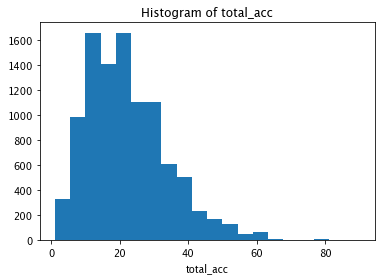

In [39]:
ax = df['total_acc'].hist(bins=20, grid=False) 
ax.set_xlabel('total_acc')
ax.set_title("Histogram of total_acc")

In [40]:
mw.data_summary(df[['total_acc', 'annual_inc']])

,total_acc,annual_inc
Data Type,float64,float64
Mean,22.0113,68203
Standard Deviation,11.7094,48590.3
Median,20,58000
Min,1,2000
Max,90,900000
# Zeros,0,0
# Nulls,5,1
% Most Frequent Value,3.69,3.81


Text(0.5, 1.0, 'Histogram of collections_12_mths_ex_med')

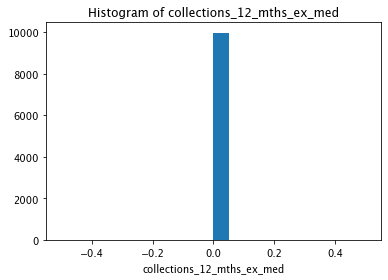

In [41]:
ax = df['collections_12_mths_ex_med'].hist(bins=20, grid=False) 
ax.set_xlabel('collections_12_mths_ex_med')
ax.set_title("Histogram of collections_12_mths_ex_med")

In [42]:
mw.data_summary(df[['collections_12_mths_ex_med', 'annual_inc']])

,collections_12_mths_ex_med,annual_inc
Data Type,float64,float64
Mean,0,68203
Standard Deviation,0,48590.3
Median,0,58000
Min,0,2000
Max,0,900000
# Zeros,9968,0
# Nulls,32,1
% Most Frequent Value,99.68,3.81


Text(0.5, 1.0, 'Histogram of mths_since_last_major_derog')

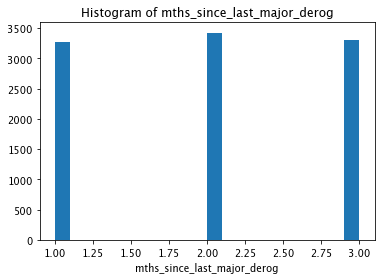

In [43]:
ax = df['mths_since_last_major_derog'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_major_derog')
ax.set_title("Histogram of mths_since_last_major_derog")

In [44]:
mw.data_summary(df[['mths_since_last_major_derog', 'annual_inc']])

,mths_since_last_major_derog,annual_inc
Data Type,int64,float64
Mean,2.0022,68203
Standard Deviation,0.810963,48590.3
Median,2,58000
Min,1,2000
Max,3,900000
# Zeros,0,0
# Nulls,0,1
% Most Frequent Value,34.24,3.81


# Correlation

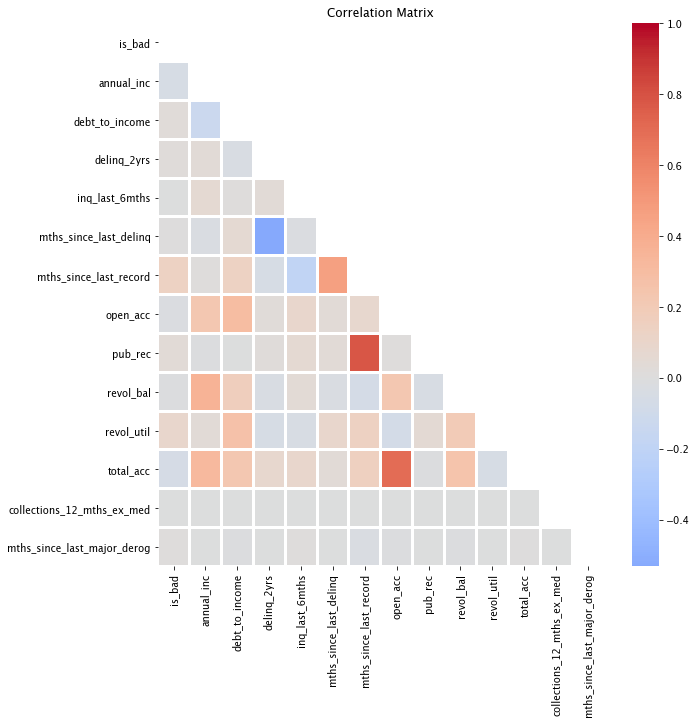

In [45]:
mw.correlation_matrix(df, cluster=False)

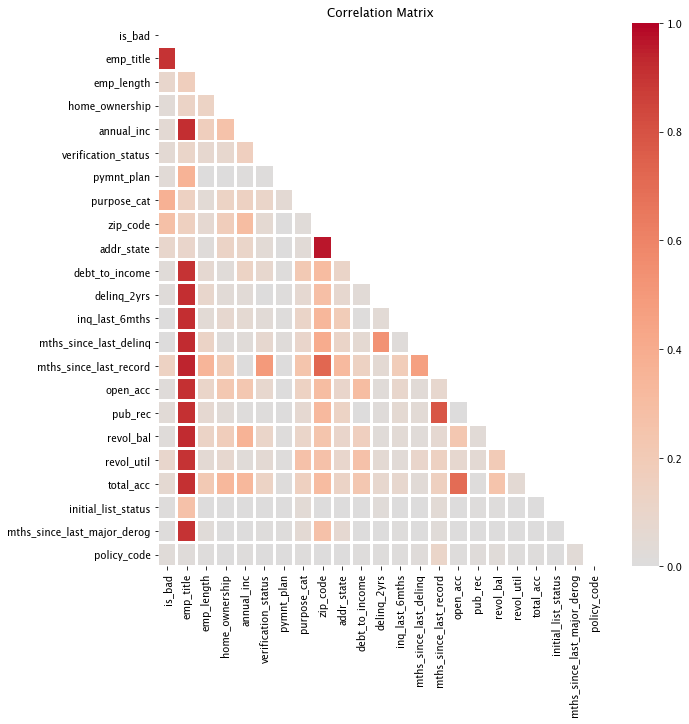

In [46]:
mw.correlation_matrix(df.drop(['Notes','collections_12_mths_ex_med', 'earliest_cr_line','purpose'],axis=1), categorical=True, cluster=False)

In [47]:
def expand_year(x):
    """Converts YY -> YYYY

    Assumes there are no records in the current year, which will be returned as-is
    """
    this_year = datetime.datetime.now().strftime("%y")
    if int(x[::-1][:2][::-1]) < int(this_year):
        return x[0:len(x) - 2] + "20" + x[len(x) - 2:]
    elif int(x[::-1][:2][::-1]) > int(this_year):
        return x[0:len(x) - 2] + "19" + x[len(x) - 2:]
    else:
        return x

In [48]:
earliest_cr = df.earliest_cr_line.dropna()
earliest_cr = earliest_cr.astype(str)
earliest_cr = pd.to_datetime(earliest_cr.apply(lambda x: expand_year(x)))
earliest_cr_line_yr = earliest_cr.dt.year
earliest_cr_line_yr = earliest_cr_line_yr.astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

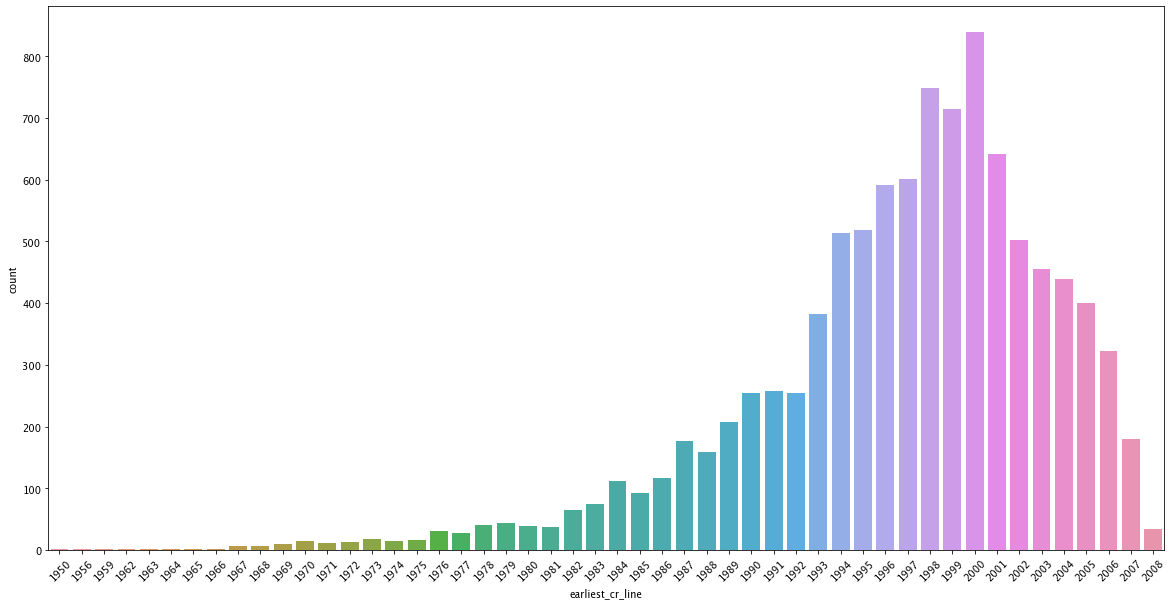

In [53]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='earliest_cr_line', data=pd.DataFrame(earliest_cr_line_yr))
plt.xticks(rotation=45)

# Feature Importance

Text(0.5, 1.0, 'Feature Importance')

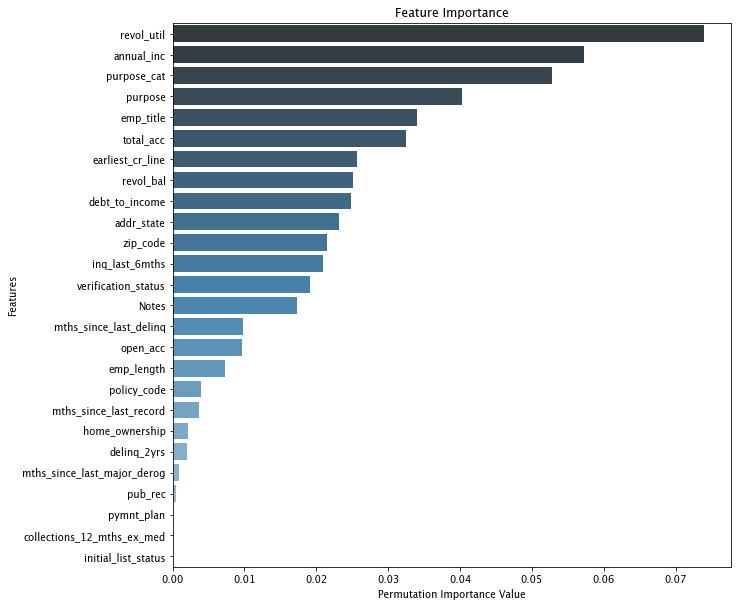

In [54]:
mw.importance(df, "is_bad", truncate=False)

# Scatter plots

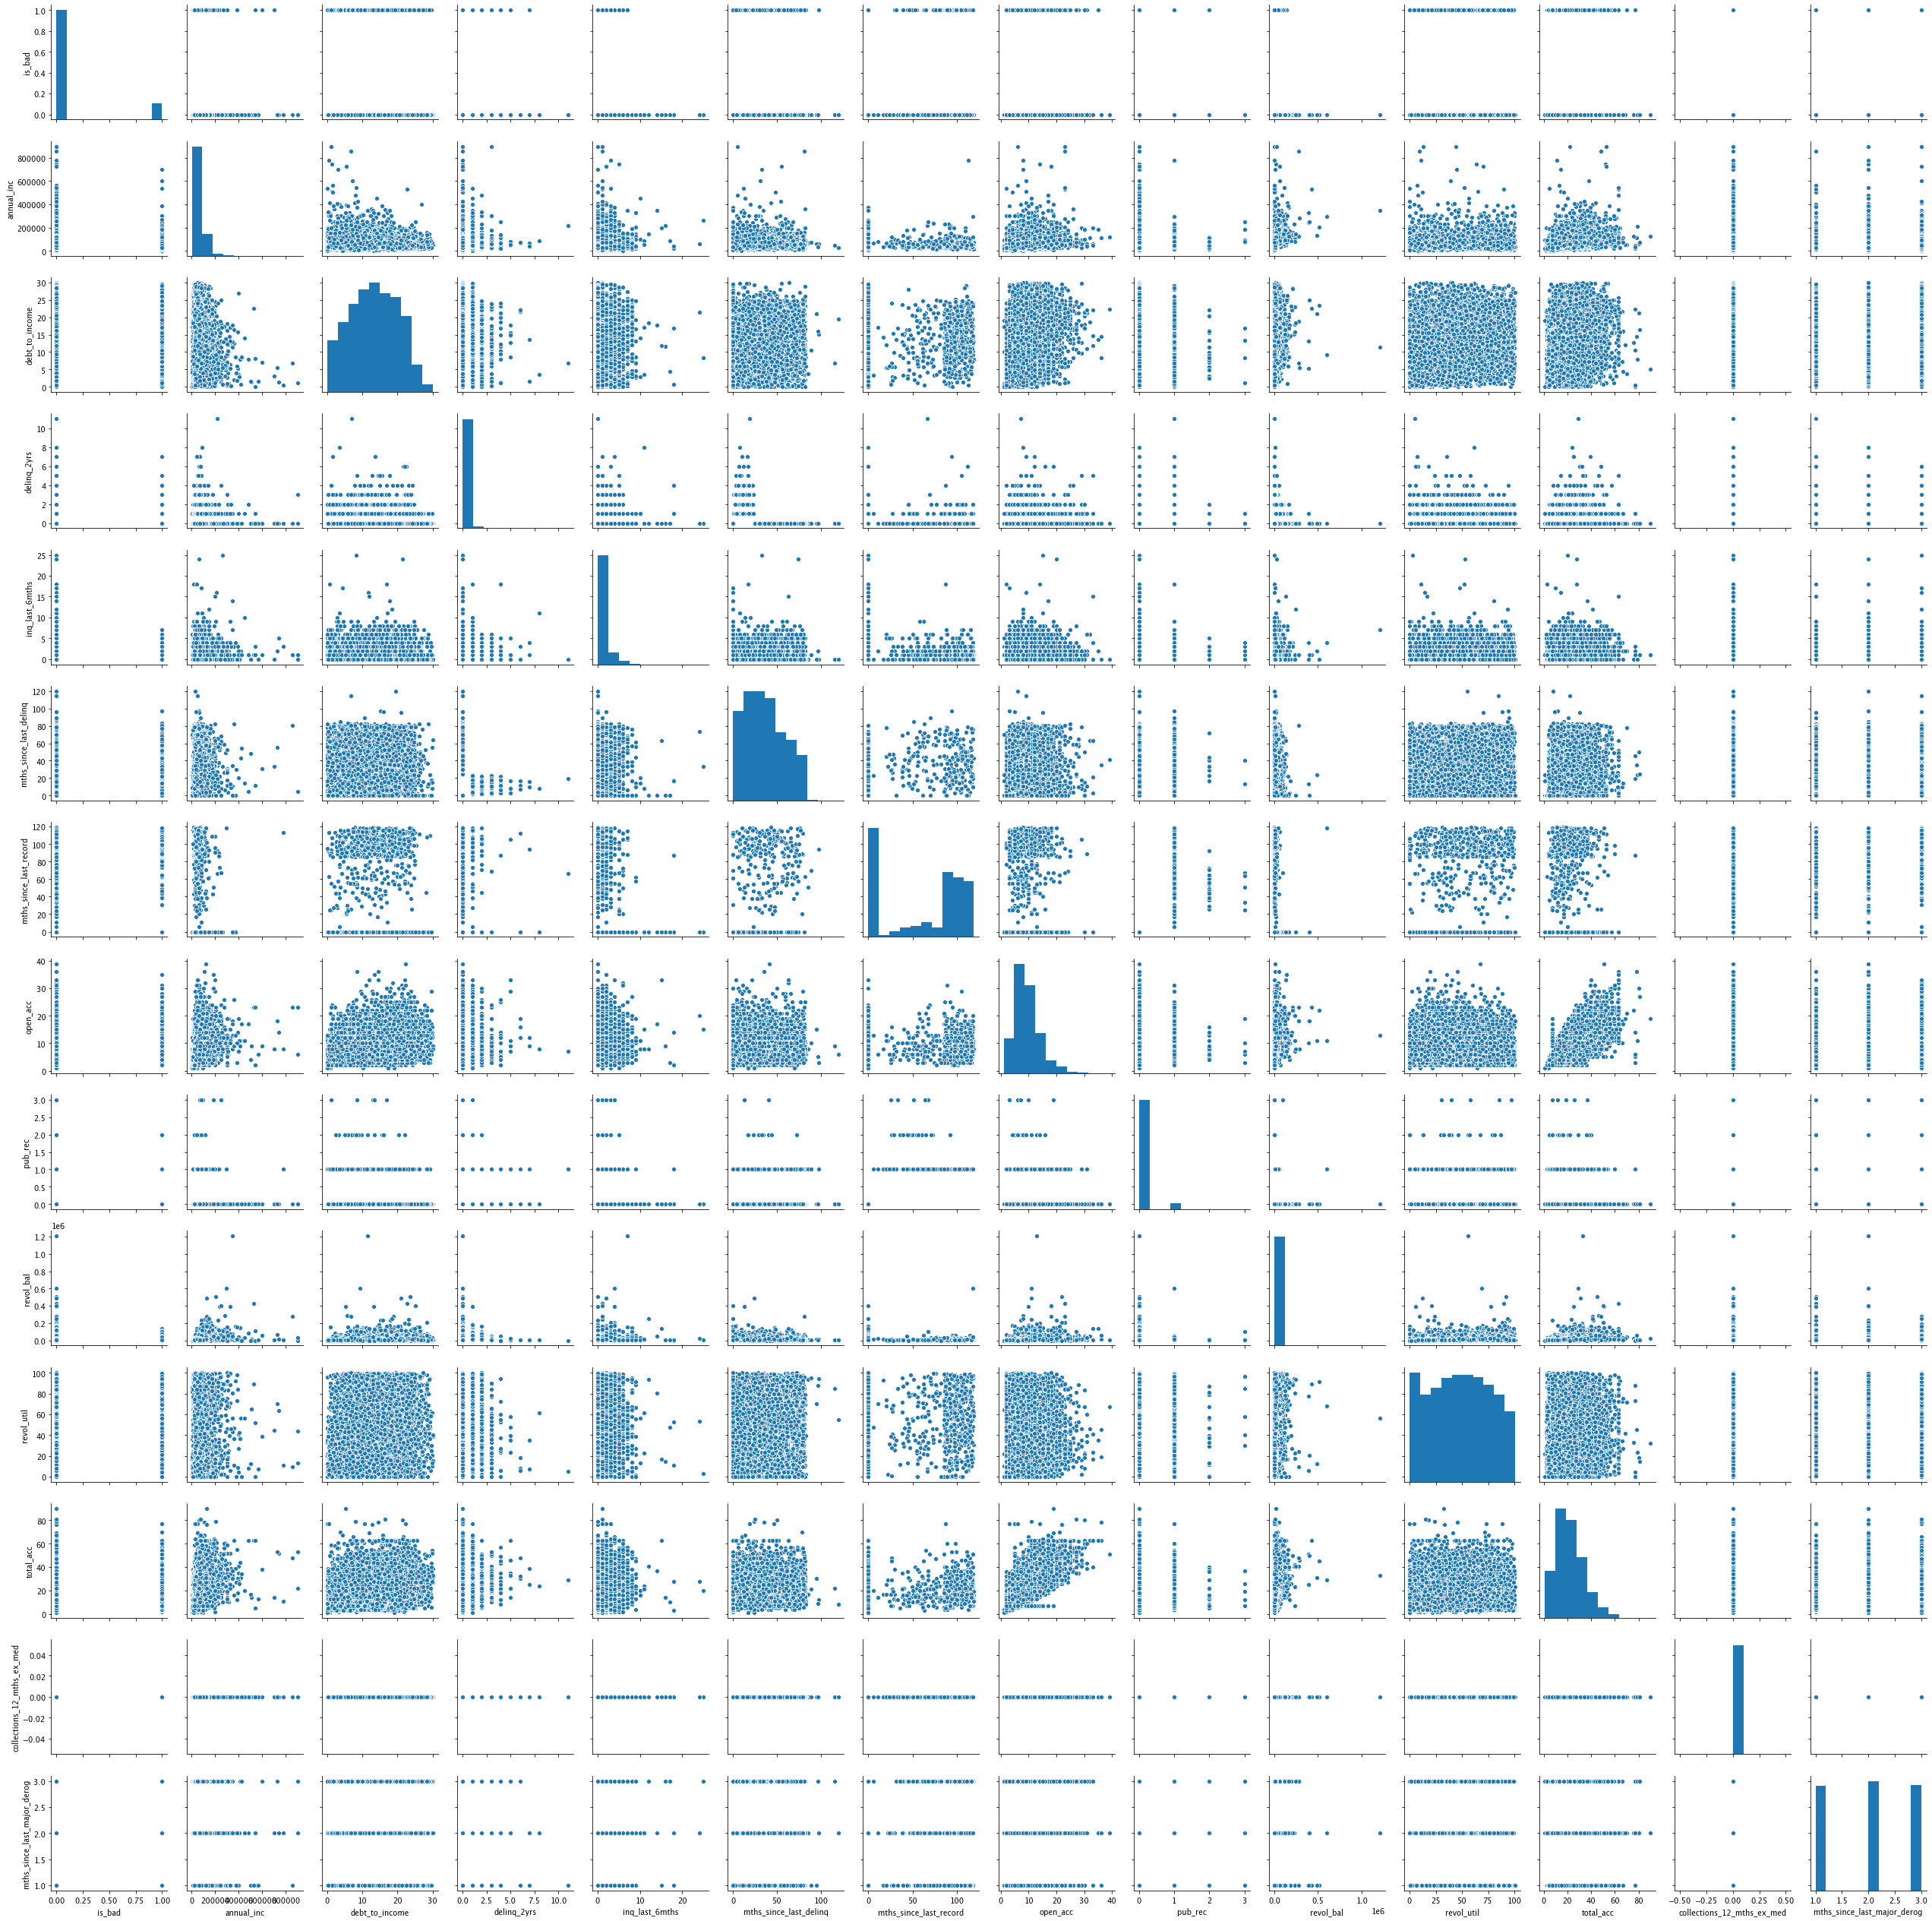

In [55]:
mw.scatter_plots(df, plot_mode='matrix')

In [58]:
clusters = mw.cluster(df.dropna())

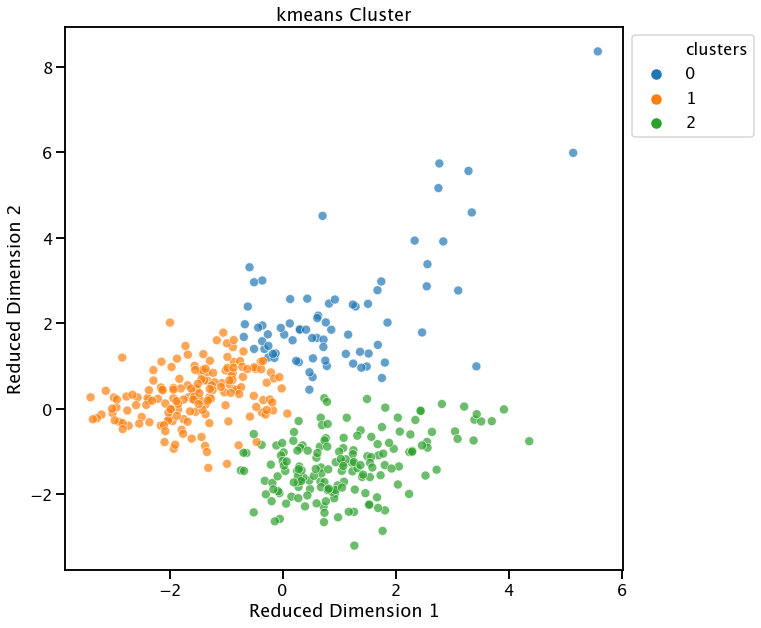

In [59]:
clusters

In [64]:
clusters_df = df.dropna()
clusters_df['cluster'] = clusters.clusters

/Users/rishisheth/opt/anaconda3/envs/data_describe/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Explore clustering

In [73]:
mw.data_summary(clusters_df.loc[clusters_df.cluster == 0])

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,zip_code,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,cluster
Data Type,int64,object,object,object,float64,object,object,object,object,object,object,object,float64,float64,object,float64,float64,float64,float64,float64,int64,float64,float64,object,float64,int64,object,int32
Mean,0.0945946,,1.39338e+84,,99742.6,,,,,,,,15.8449,0.662162,,3.62162,15.973,2.66216,15.7838,0.0405405,40518.7,44.9743,34.973,,0,2.05405,,0
Standard Deviation,0.294652,,,,68785.7,,,,,,,,7.30762,1.83032,,5.00877,21.9151,14.5868,4.98015,0.198569,61041.9,28.6303,10.1953,,0,0.774453,,0
Median,0,,3,,83600,,,,,,,,16.77,0,,2,5.5,0,15,0,19981.5,42.35,34,,0,2,,0
Min,0,,,,26000,,,,,,,,1.06,0,,0,0,0,7,0,378,0,14,,0,1,,0
Max,1,,,,374000,,,,,,,,29.21,11,,25,74,105,33,1,401941,100.6,63,,0,3,,0
# Zeros,67,,,,0,,,,,,,,0,56,,19,36,71,0,71,0,1,0,,74,0,,74
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,90.54,4.05,28.38,64.86,5.41,97.3,100,2.7,39.19,5.41,5.41,18.92,2.7,75.68,4.05,25.68,48.65,95.95,14.86,95.95,1.35,1.35,9.46,100,100,40.54,33.78,100


In [74]:
mw.data_summary(clusters_df.loc[clusters_df.cluster == 1])

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,zip_code,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,cluster
Data Type,int64,object,object,object,float64,object,object,object,object,object,object,object,float64,float64,object,float64,float64,float64,float64,float64,int64,float64,float64,object,float64,int64,object,int32
Mean,0.0914634,,6.7769e+183,,52311,,,,,,,,10.3496,0.231707,,1.86585,14.7744,1.14634,6.17073,0.0365854,6968.97,46.9024,11.7073,,0,2.07927,,1
Standard Deviation,0.28915,,,,30526.7,,,,,,,,7.57415,0.581911,,2.63419,20.2849,6.61681,3.20775,0.188317,8134.48,30.7185,6.46935,,0,0.821377,,0
Median,0,,2,,44120.8,,,,,,,,9.775,0,,1,0,0,6,0,4172.5,44.1,11,,0,2,,1
Min,0,,,,12000,,,,,,,,0,0,,0,0,0,1,0,0,0,1,,0,1,,1
Max,1,,,,168000,,,,,,,,29.6,3,,18,81,55,15,1,40384,100,33,,0,3,,1
# Zeros,149,,,,0,,,,,,,,5,137,,58,90,158,0,158,9,9,0,,164,0,,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,90.85,1.22,42.68,72.56,4.88,98.17,100,0.61,39.63,4.88,5.49,12.8,3.05,83.54,2.44,35.37,54.88,96.34,12.8,96.34,5.49,5.49,8.54,99.39,100,37.8,28.66,100


In [75]:
mw.data_summary(clusters_df.loc[clusters_df.cluster == 2])

,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,purpose,zip_code,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,cluster
Data Type,int64,object,object,object,float64,object,object,object,object,object,object,object,float64,float64,object,float64,float64,float64,float64,float64,int64,float64,float64,object,float64,int64,object,int32
Mean,0.195122,,1.31409e+207,,64444.9,,,,,,,,13.635,0.268293,,1.53659,42.2134,85.5488,9.7439,1.06098,8869.29,56.361,23.1585,,0,1.95732,,2
Standard Deviation,0.397508,,,,32615.4,,,,,,,,6.38189,0.520707,,1.71386,22.6309,25.1755,4.34356,0.264346,9113.85,26.2416,10.8639,,0,0.80146,,0
Median,0,,5,,58900,,,,,,,,13.65,0,,1,43,91,9,1,6203.5,57.95,21,,0,2,,2
Min,0,,,,20000,,,,,,,,1.33,0,,0,0,20,3,1,0,0,7,,0,1,,2
Max,1,,,,237000,,,,,,,,29.16,2,,9,97,119,23,3,62265,99.3,77,,0,3,,2
# Zeros,132,,,,0,,,,,,,,0,126,,55,5,0,0,0,4,3,0,,164,0,,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,80.49,1.22,28.05,53.66,4.27,45.12,100,0.61,41.46,6.71,2.44,17.68,1.22,76.83,3.05,33.54,4.88,4.27,12.2,94.51,2.44,1.83,8.54,100,100,35.98,23.78,100
